# XOR-Problem

In [155]:
import numpy as np
import sys, os
import matplotlib.pyplot as plt
np.random.seed(42)

# Automatically detect project root (folder containing `lib`)
current_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(project_root)

print("Added to path:", project_root)


from lib import Model, Linear, Tanh, Sigmoid, MSELoss, SGD

Added to path: d:\omar\Summer 2025\CI\project\Neural-Network-Library_Advanced-Applications


In [156]:
# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y = np.array([[0],[1],[1],[0]], dtype=float)

In [157]:
model = Model()
model.add(Linear(4)) # 1st hidden layer with 4 neurons
model.add(Tanh())    # activation function
model.add(Linear(1)) # output layer
model.add(Sigmoid()) # activation function

# Force weight initialization
model._forward(X[:0]) 

model.compile(optimizer=lambda params: SGD(params, lr=0.9), loss=MSELoss())


In [158]:
history = model.fit(X, y, epochs=200, batch_size=4)
print('Training done')

Epoch 1/200 - loss: 0.255433
Epoch 20/200 - loss: 0.250950
Epoch 40/200 - loss: 0.249069
Epoch 60/200 - loss: 0.247400
Epoch 80/200 - loss: 0.245503
Epoch 100/200 - loss: 0.243201
Epoch 120/200 - loss: 0.240327
Epoch 140/200 - loss: 0.236696
Epoch 160/200 - loss: 0.232096
Epoch 180/200 - loss: 0.226282
Epoch 200/200 - loss: 0.218971
Training done


Predictions: 
 [[0.42947278]
 [0.53063802]
 [0.52824249]
 [0.4969292 ]]
Rounded: 
 [[0.]
 [1.]
 [1.]
 [0.]]
True labels: 
 [[0.]
 [1.]
 [1.]
 [0.]]
Accuracy: 100.00%


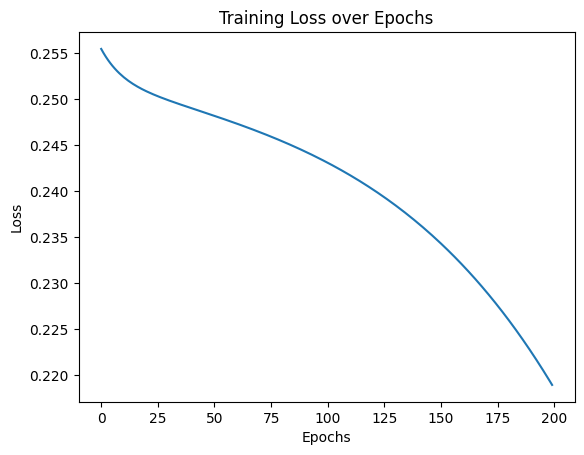

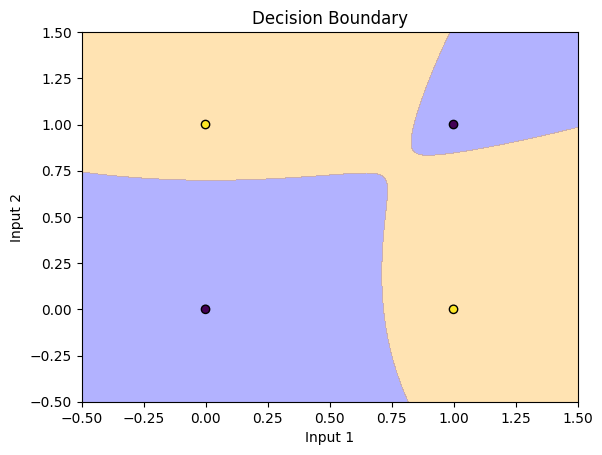

In [159]:
preds = model.predict(X)
print('Predictions:',"\n", preds)
print('Rounded:',"\n", np.round(preds))
print('True labels:',"\n", y)

if (preds.shape == y.shape):
    accuracy = np.mean(np.round(preds) == y)
    print(f'Accuracy: {accuracy*100:.2f}%')


plt.plot(history['loss'])
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# plot decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid).reshape(xx.shape)
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'orange'])
plt.scatter(X[:,0], X[:,1], c=y.flatten(), edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()